# $\LARGE Artificial \ Neural \ Network$ 

# Act 1 - Read Data
#### Import the usual 4  packages!

Let's start by importing the important packages!

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

Read your data

In [17]:
cat=pd.read_csv('../Data/Star_Formation/HiGAL_clump_catalogue_correct_formatting.csv')

check head, and describe

In [18]:
cat.head()

,ID,DESIGNATION,GLON,GLAT,ra,dec,DESIGNATION_70,F70,DF70,F70_TOT,...,EVOL_FLAG,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS
0,4454,HIGALBM9.2545+1.0842,9.254488,1.084173,270.54295,-20.408795,-,0.0,0.0,0.0,...,1.0,-7.63,-1.86,10.84,0.48,0.0,-1.19,5.19,16.79,0.073
1,4455,HIGALBM9.2569-0.2825,9.256889,-0.282502,271.81796,-21.076705,-,0.0,0.0,0.0,...,1.0,-30.79,-6.40,10.31,0.42,70.3,-3.38,4.31,15.70,0.551
2,4456,HIGALBM9.2582-0.4725,9.258172,-0.472514,271.99662,-21.167985,-,0.0,0.0,0.0,...,1.0,-10.36,-2.69,12.32,0.66,0.0,-3.49,7.70,19.08,0.105
3,4457,HIGALBM9.2604-0.2253,9.260426,-0.225272,271.76624,-21.045749,-,0.0,0.0,0.0,...,1.0,-25.06,-7.33,9.47,0.42,58.2,-1.69,3.49,14.53,0.377
4,4458,HIGALBM9.2626-0.1134,9.262623,-0.113445,271.66278,-20.989332,-,0.0,0.0,0.0,...,1.0,-50.04,-18.92,9.48,0.42,55.3,-3.41,3.51,14.56,0.341


In [19]:
cat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,1732.0,10666.594111,5659.007313,4454.000000,4886.750000,15760.500000,16193.250000,16626.000000
GLON,1732.0,20.681977,10.301232,9.254488,10.152985,30.025016,30.745236,31.496995
GLAT,1732.0,-0.103156,0.501320,-1.277056,-0.453265,-0.108080,0.225755,1.242487
ra,1732.0,277.147742,4.875525,270.542950,272.292923,281.041685,281.903080,283.019690
dec,1732.0,-10.894404,9.148600,-21.484523,-20.205528,-2.864130,-1.963998,-0.764793
...,...,...,...,...,...,...,...,...
LAM_0_TK,1732.0,35.739319,47.893383,0.000000,0.000000,0.000000,68.325000,285.300000
L_BOL,1732.0,2184.957927,14235.393590,-3325.660000,-6.842500,-2.090000,301.497500,270267.530000
LRATIO,1732.0,42.264983,240.913000,2.220000,6.515000,11.530000,31.475000,7107.340000
T_BOL,1732.0,28.223967,14.194161,11.930000,18.270000,22.870000,36.035000,154.830000


In [20]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1732 non-null   int64  
 1   DESIGNATION       1732 non-null   object 
 2   GLON              1732 non-null   float64
 3   GLAT              1732 non-null   float64
 4   ra                1732 non-null   float64
 5   dec               1732 non-null   float64
 6   DESIGNATION_70    1732 non-null   object 
 7   F70               1732 non-null   float64
 8   DF70              1732 non-null   float64
 9   F70_TOT           1732 non-null   float64
 10  DF70_TOT          1732 non-null   float64
 11  F70_ADD           1732 non-null   float64
 12  DF70_ADD          1732 non-null   float64
 13  F70_ADD_TOT       1732 non-null   float64
 14  DF70_ADD_TOT      1732 non-null   float64
 15  ULIM_70           1732 non-null   float64
 16  DESIGNATION_160   1732 non-null   object 


# Act 2 - Data Prepration
#### 2.1 Train Test Split
- Get rid of those EVOL_FLAG == 0

In [21]:
cat = cat[cat['EVOL_FLAG'] != 0]

#### 2.2 Prepare X
Set your X:
- X=cat where ['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870', 'F1100', 'DFWHM250']

Set your y:

Use get_dummies to add a new column to your data! You want 0.0 for 'Flag_1' and 1.0 for 'Flag_2'
- Make sure this new column has the format of integer!
- Maybe call this new column 'Evolution_Falg_dummies'
- Hint: Use this: drop_first=True, why?
- Check this out: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

- y=cat['Evolution_Falg_dummies']

In [22]:
x = cat[['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870', 'F1100', 'DFWHM250']]

In [23]:
cat['evoflag dummies'] = pd.get_dummies(data = cat['EVOL_FLAG'],
                                        drop_first = True).astype('int')
y = cat['evoflag dummies']

#### 2.3 perform your train test split
However, do it twice to create train 70%, validation 15%, & test set 15%

In [24]:
xtrain, xmid, ytrain, ymid = train_test_split(x, y, test_size = .3)

In [25]:
xvalid, xtest, yvalid, ytest = train_test_split(xmid, ymid, test_size=0.5)

#### 2.4 Now perform the scaling on your data!

In [45]:
scal = StandardScaler()

scaledxtrain = pd.DataFrame(scal.fit_transform(xtrain), columns = x.columns)
scaledxvalid = pd.DataFrame(scal.transform(xvalid), columns = x.columns)
scaledxtest = pd.DataFrame(scal.transform(xtest), columns = x.columns)

# Act 3 - Perform the ANN

#### 3.1 Create your model 
It should contain:
- 3 hidden layers of 18-10-10
- 1 output
- Add activations apprpriately!

- **make sure to compile it with appropriate optimizer and loss!**


## Important Note:
#### For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
             )

#### For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              )

#### For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')
              
### You may want to change optimizer to ADAM though!

In [ ]:
model = Sequential()

model.add(Dense(18, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

#### 3.2 Let's add more to your model! 
After each layer add 50% dropout (this should exculde the last one, why?)

In [ ]:
# make a sequential ANN model
model = Sequential()

# add hidden layers
model.add(Dense(18, activation = 'relu'))
model.add(Dropout(0.5)) # randomly turns off 50% of the neurons in this layer between each epoch

model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.5))

# output layer; no dropout because only one neuron and becasue we want every neuron here to actually give a result
model.add(Dense(1, activation = 'sigmoid'))

# compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

#### 3.3 We don't want our code to overfit, so import the early stopping and add the parameters appropriately

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss',
                           mode = 'min',
                           verbose = 1,
                           patience = 25)

# Fit Model with no early stopping!
#### 3.4 Fit your model
- Make sure to use epochs, verbose, and validation_data
- **Howver, for the sake of this exercise exclude the batch_size and callbacks**
- I used epoch = 1000 you may choose smaller number if you want the code to run faster!

In [ ]:
model.fit(x = scaledxtrain, y = ytrain,
          epochs = 1000,
          validation_data = (scaledxvalid, yvalid))

#### create your df_loss dataframe as well as perform the plotting on how the history of loss changes!

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,val_loss
0,0.701652,0.638247
1,0.712144,0.635229
2,0.672627,0.628594
3,0.680271,0.622143
4,0.681333,0.620339
...,...,...
995,0.218598,0.124927
996,0.221340,0.124688
997,0.203965,0.138596
998,0.277644,0.137040


<AxesSubplot:>

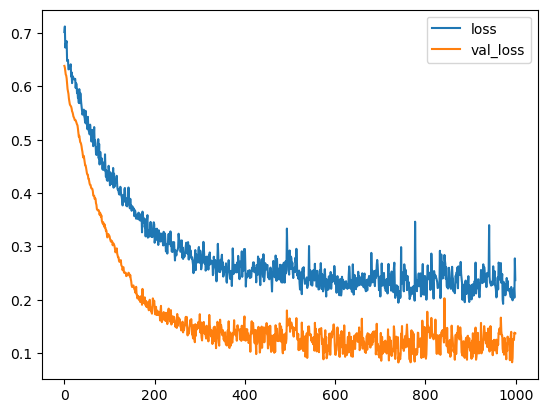

In [ ]:
loss_df.plot()

# Fit the model with the early stopping
#### 3.5 Now this time include the early stopping in
- Re-run the cell with your model defined in it and come back here again!
- Make sure to use epochs, verbose, validation_data, and callbacks 
- Plot loss vs epoch
- **Note: no need to include the batch_size your data is small enough that we don't need it.**

In [ ]:
# make a sequential ANN model
model = Sequential()

# add hidden layers
model.add(Dense(18, activation = 'relu'))
model.add(Dropout(0.5)) # randomly turns off 50% of the neurons in this layer between each epoch

model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.5))

# output layer; no dropout because only one neuron and becasue we want every neuron here to actually give a result
model.add(Dense(1, activation = 'sigmoid'))

# compile model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
model.fit(x = scaledxtrain, y = ytrain,
          epochs = 1000,
          batch_size = 600,
          validation_data = (scaledxvalid, yvalid),
          callbacks = early_stop)

Epoch 1/1000
2/2 [==============================] - 0s 149ms/step - loss: 0.7798 - val_loss: 0.7147
Epoch 2/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7771 - val_loss: 0.7101
Epoch 3/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7385 - val_loss: 0.7057
Epoch 4/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7464 - val_loss: 0.7014
Epoch 5/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7286 - val_loss: 0.6976
Epoch 6/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7265 - val_loss: 0.6935
Epoch 7/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7067 - val_loss: 0.6898
Epoch 8/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7092 - val_loss: 0.6863
Epoch 9/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7152 - val_loss: 0.6831
Epoch 10/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7157 - val_loss: 0.6800
Epoch 11

<AxesSubplot:>

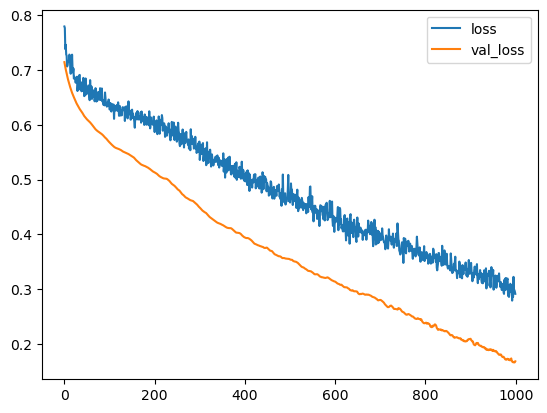

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
pred = model.predict(scaledxtest)

8/8 [==============================] - 0s 2ms/step


# Evaluate your model!
#### 3.6 Perfomr your evaluation on your test! Remember your test MUST be unseen data to your model!

- If you got to an error print your pred and see how it looks like! What should you do? Round the?

In [ ]:
print(pred)

[[0.08505376]
 [0.10233876]
 [1.        ]
 [0.1617819 ]
 [0.14927232]
 [0.09287658]
 [0.14016089]
 [0.12908986]
 [0.15031734]
 [0.17295352]
 [0.11514549]
 [0.10857747]
 [0.5527309 ]
 [0.06786072]
 [0.16609693]
 [0.9575288 ]
 [0.16195387]
 [0.43651584]
 [1.        ]
 [1.        ]
 [0.12942982]
 [0.27788335]
 [0.13731042]
 [0.99998003]
 [0.18599036]
 [1.        ]
 [0.14133118]
 [0.7601897 ]
 [0.10746119]
 [1.        ]
 [0.9999886 ]
 [0.4105569 ]
 [0.12889934]
 [0.1266704 ]
 [0.18678322]
 [0.13933976]
 [0.7765943 ]
 [0.15423346]
 [0.15925264]
 [0.10812479]
 [0.9740679 ]
 [0.9998958 ]
 [0.99249244]
 [0.40499938]
 [0.09112655]
 [0.9276077 ]
 [0.9964538 ]
 [0.11627202]
 [0.23188281]
 [0.04370607]
 [0.15183914]
 [0.99944067]
 [1.        ]
 [0.09576987]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.09236699]
 [1.        ]
 [0.17595652]
 [0.06464879]
 [1.        ]
 [0.9209164 ]
 [0.15034527]
 [0.09006651]
 [0.2608652 ]
 [0.13687173]
 [0.12597734]
 [0.11427228]
 [0.43316948]
 [0.34

In [ ]:
pred = np.around(pred)

In [ ]:
print(confusion_matrix(ytest, pred), '\n')
print(classification_report(ytest, pred))

[[136   0]
 [ 11  99]] 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       136
           1       1.00      0.90      0.95       110

    accuracy                           0.96       246
   macro avg       0.96      0.95      0.95       246
weighted avg       0.96      0.96      0.95       246



[[126   2]
 [ 10 108]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       128
           1       0.98      0.92      0.95       118

    accuracy                           0.95       246
   macro avg       0.95      0.95      0.95       246
weighted avg       0.95      0.95      0.95       246



## Act 4 Happy with the model? Save it!
#### 4.1 Save the model

In [ ]:
model.save('ANN.h5')

#### 4.2 load the model

In [27]:
from keras.models import load_model

In [28]:
loadedmodel = load_model('ANN.h5')

#### 4.3 for the data point below:
- Perform the scaling
- Predict the outcome

In [29]:
#Leave as it is
cols= ['F70', 'F160', 'F250', 'F350', 'F500', 'F21', 'F22', 'F24', 'F870', 'F1100', 'DFWHM250']
new_datapoint = [100*np.random.randn() for i in cols]

scale your data point and call it new_datapoint_scld

Hint: Do you have to reshape your data point?

In [30]:
new_datapoint

[-18.726074720272923,
 76.52854275198973,
 263.0463193581147,
 -37.33122223880064,
 24.36933727921679,
 87.4225959025452,
 56.024955923164285,
 -13.790082570256452,
 102.1879597241592,
 -117.7189670049632,
 -129.85282472595122]

In [46]:
new_datapoint = np.reshape(new_datapoint, (1,len(cols)))
newscaled = pd.DataFrame(scal.transform(new_datapoint), columns = cols)

newscaled

,F70,F160,F250,F350,F500,F21,F22,F24,F870,F1100,DFWHM250
0,-0.355352,0.402982,2.903549,-1.210022,0.660657,9.24288,4.866838,-0.000148,68.132802,-117.718967,-18.662175


Now perform the perdiction

In [47]:
pred = loadedmodel.predict(newscaled)
pred

1/1 [==============================] - 0s 16ms/step


array([[1.]], dtype=float32)

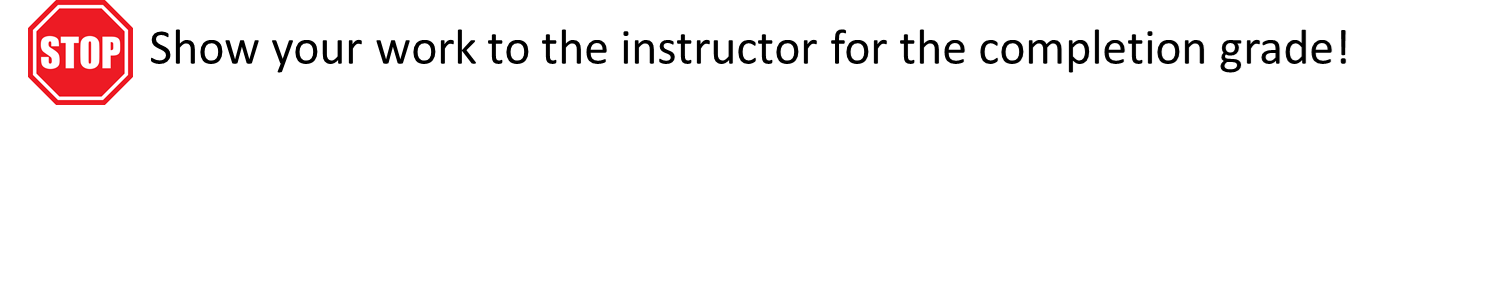